<a href="https://colab.research.google.com/github/munenedev/Linear_Regression/blob/main/embedded_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.linear_model import LassoCV
from category_encoders import BackwardDifferenceEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploads=files.upload()

Saving Nairobi Office Price Ex.csv to Nairobi Office Price Ex.csv


In [ ]:
data=pd.read_csv('Nairobi Office Price Ex.csv')
nominal=['LOC','FUR','WATER','HK_SER']
ordinal=['AMB','PROX_SCH','PROX_ROAD','PROX_MALL']
numerical = ['SIZE']
target = ['PRICE']

for feature in ordinal:
  value = data[feature]
  encoder = LabelEncoder()
  trans_f = encoder.fit_transform(value)
  data[feature]=trans_f

data

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,2,0,1,1,yes,yes,32.502345,31.707006
1,madaraka,yes,1,1,1,1,no,no,53.426804,68.777596
2,karen,no,0,0,1,1,yes,yes,61.530358,62.562382
3,karen,yes,1,0,0,0,yes,yes,47.475640,71.546632
4,buruburu,no,1,0,1,1,yes,yes,59.813208,87.230925
5,donholm,no,2,0,0,1,no,yes,55.142188,78.211518
6,langata,no,3,1,1,0,no,yes,52.211797,79.641973
7,langata,yes,2,0,0,1,yes,no,39.299567,59.171489
8,donholm,yes,1,1,0,0,yes,no,48.105042,75.331242
9,karen,yes,2,0,0,0,no,no,52.550014,71.300880


In [ ]:
sns.pairplot(data,kind='reg',diag_kind='kde')

In [ ]:
data = pd.concat([pd.get_dummies(data[nominal]),data],axis=1) 
data.drop(nominal,axis=1,inplace=True)
data

,LOC_buruburu,LOC_donholm,LOC_karen,LOC_langata,LOC_madaraka,FUR_no,FUR_yes,WATER_no,WATER_yes,HK_SER_no,HK_SER_yes,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,SIZE,PRICE
0,0,0,1,0,0,0,1,0,1,0,1,2,0,1,1,32.502345,31.707006
1,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1,53.426804,68.777596
2,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,61.530358,62.562382
3,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,47.475640,71.546632
4,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,59.813208,87.230925
5,0,1,0,0,0,1,0,1,0,0,1,2,0,0,1,55.142188,78.211518
6,0,0,0,1,0,1,0,1,0,0,1,3,1,1,0,52.211797,79.641973
7,0,0,0,1,0,0,1,0,1,1,0,2,0,0,1,39.299567,59.171489
8,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0,48.105042,75.331242
9,0,0,1,0,0,0,1,1,0,1,0,2,0,0,0,52.550014,71.300880


In [ ]:
X = data.drop("PRICE",1)
y = data["PRICE"]
regressor=LassoCV()
regressor.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
new_x = PowerTransformer().fit_transform(data)

test_data = pd.DataFrame(new_x,columns=data.columns)
test_data = pd.concat([test_data[ordinal],test_data[numerical],test_data[target]],axis=1)
test_data

,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,SIZE,PRICE
0,0.907859,-1.0,0.866025,0.866025,-1.910520,-2.060592
1,-0.297095,1.0,0.866025,0.866025,0.316823,-0.178865
2,-1.761084,-1.0,0.866025,0.866025,1.699631,-0.673078
3,-0.297095,-1.0,-1.154701,-1.154701,-0.500955,0.069057
4,-0.297095,-1.0,0.866025,0.866025,1.379363,1.827632
5,0.907859,-1.0,-1.154701,0.866025,0.582806,0.740273
6,1.970400,1.0,0.866025,-1.154701,0.136788,0.898605
7,0.907859,-1.0,-1.154701,0.866025,-1.377279,-0.908206
8,-0.297095,1.0,-1.154701,-1.154701,-0.421937,0.436974
9,0.907859,-1.0,-1.154701,-1.154701,0.186215,0.046338


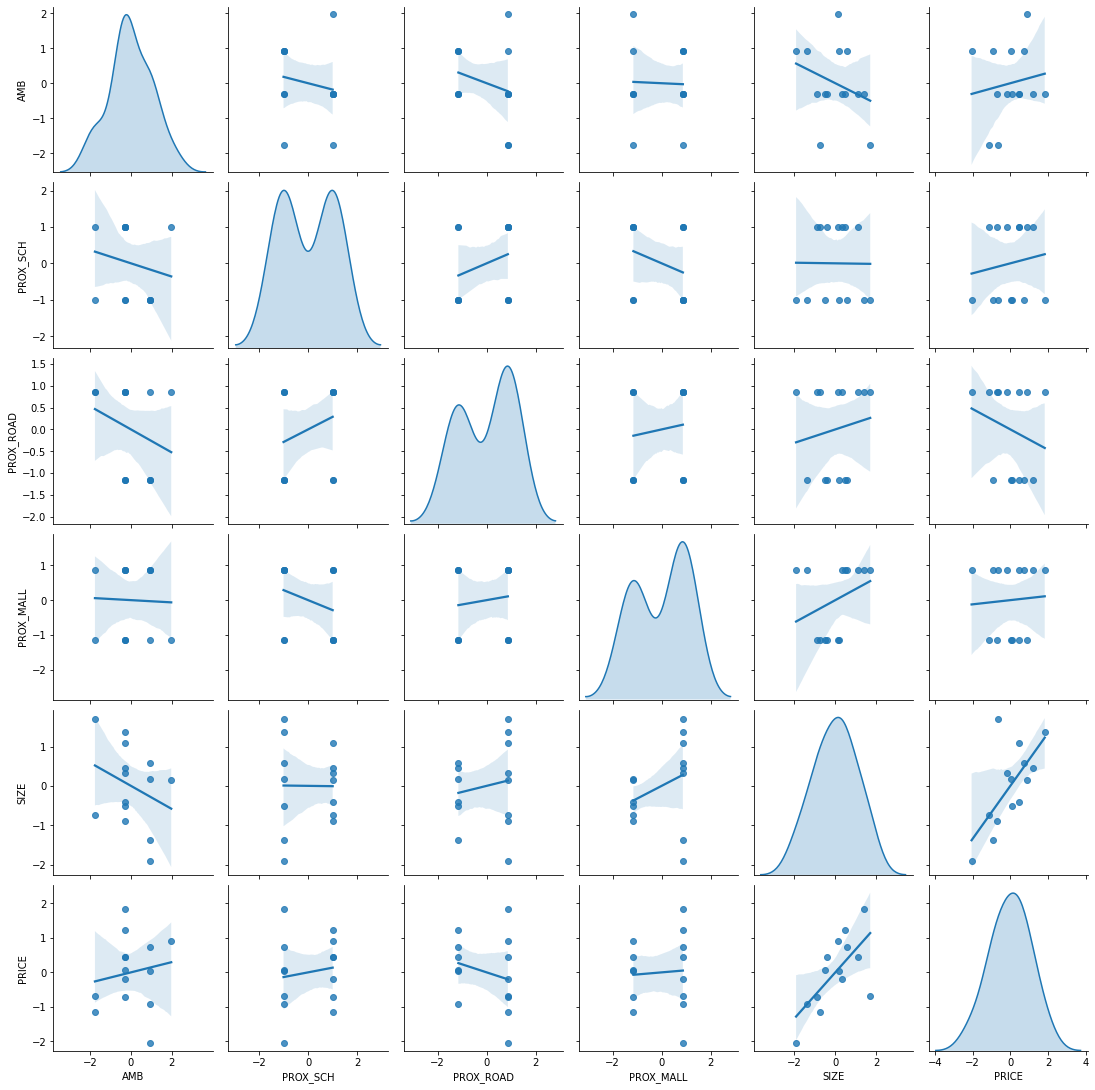

In [ ]:
sns.pairplot(test_data,kind='reg',diag_kind='kde')

L1 selected only  5  features out of  16  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

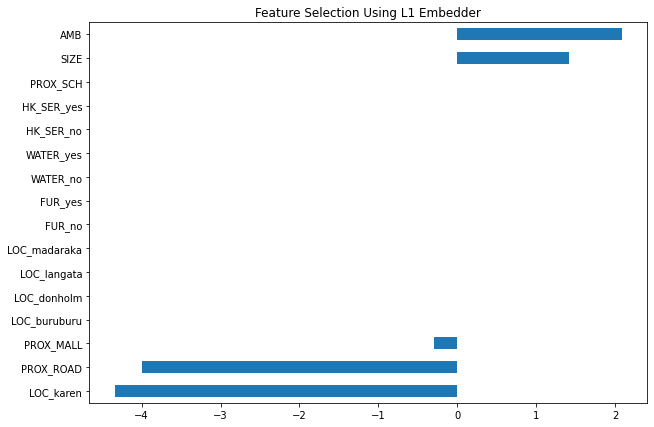

In [ ]:
#print(regressor.coef_)
coef_col = pd.Series(regressor.coef_,index=X.columns)

#print(coef_col)
sorted_coef = coef_col.sort_values()
matplotlib.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")